In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Load from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

print(df.head())
x = df.drop("MEDV", axis=1)
y = df["MEDV"]

# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


C:\Users\Solution\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [64]:
df.shape

(506, 14)

Description of DataSet

In [65]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

Preparing The Dataset

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [9]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [11]:
# print(df["Price"].value_counts())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [11]:
df.describe().sum()

CRIM        611.213226
ZN          653.186089
INDUS       585.177132
NOX         509.537573
RM          544.045752
AGE         922.223763
DIS         535.652903
TAX        3255.774270
PTRATIO     617.870479
B          2514.231396
LSTAT       600.759125
MEDV        655.954910
dtype: float64

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92,8.5
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432.0,17.8,388.74,10.45,18.5
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666.0,20.2,396.90,10.74,23.0


In [15]:
df["CRIM"].value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [66]:
df["CRIM"].to_string()

'0       0.00632\n1       0.02731\n2       0.02729\n3       0.03237\n4       0.06905\n5       0.02985\n6       0.08829\n7       0.14455\n8       0.21124\n9       0.17004\n10      0.22489\n11      0.11747\n12      0.09378\n13      0.62976\n14      0.63796\n15      0.62739\n16      1.05393\n17      0.78420\n18      0.80271\n19      0.72580\n20      1.25179\n21      0.85204\n22      1.23247\n23      0.98843\n24      0.75026\n25      0.84054\n26      0.67191\n27      0.95577\n28      0.77299\n29      1.00245\n30      1.13081\n31      1.35472\n32      1.38799\n33      1.15172\n34      1.61282\n35      0.06417\n36      0.09744\n37      0.08014\n38      0.17505\n39      0.02763\n40      0.03359\n41      0.12744\n42      0.14150\n43      0.15936\n44      0.12269\n45      0.17142\n46      0.18836\n47      0.22927\n48      0.25387\n49      0.21977\n50      0.08873\n51      0.04337\n52      0.05360\n53      0.04981\n54      0.01360\n55      0.01311\n56      0.02055\n57      0.01432\n58      0.154

In [19]:
pd.set_option("display.max_rows", None)  # show all rows
print(df["CRIM"])

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
30      1.13081
31      1.35472
32      1.38799
33      1.15172
34      1.61282
35      0.06417
36      0.09744
37      0.08014
38      0.17505
39      0.02763
40      0.03359
41      0.12744
42      0.14150
43      0.15936
44      0.12269
45      0.17142
46      0.18836
47      0.22927
48      0.25387
49      0.21977
50      0.08873
51      0.04337
52      0.05360
53      0.04981
54      0.01360
55      0.01311
56      0.02055
57      0.01432
58      0.15445
59      0.10328
60      0.14932
61      0.17171
62      

<Axes: xlabel='CRIM'>

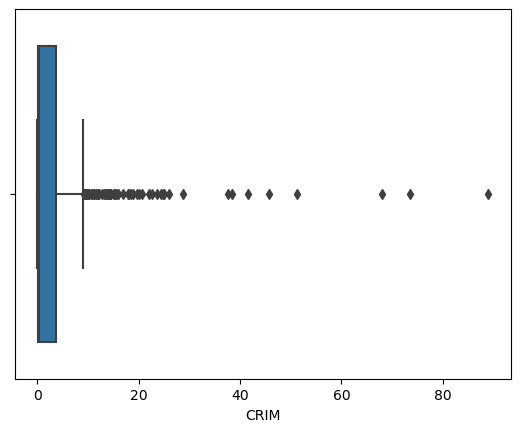

In [17]:
sns.boxplot(x=df["CRIM"])

In [67]:
df=df[df["CRIM"]!=88.97620]

<Axes: xlabel='CRIM'>

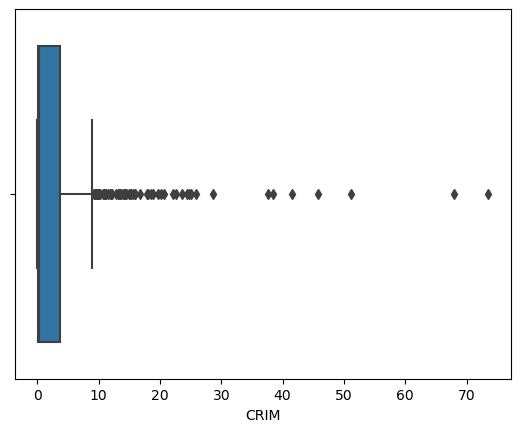

In [68]:
sns.boxplot(x=df["CRIM"])

In [20]:
df["ZN"].value_counts()

ZN
0.0      371
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

<Axes: >

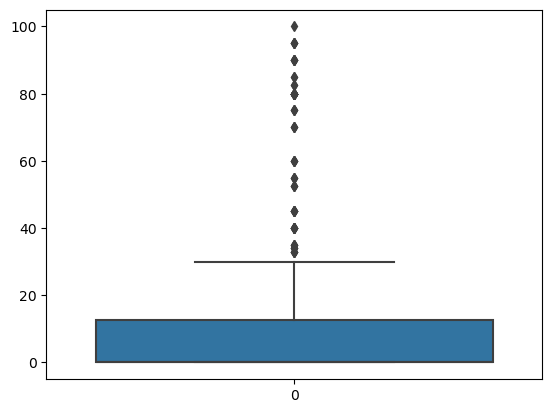

In [21]:
sns.boxplot(df["ZN"])

In [51]:
df["INDUS"].value_counts()

INDUS
18.10    131
19.58     30
8.14      22
6.20      18
21.89     15
3.97      12
9.90      12
8.56      11
10.59     11
5.86      10
6.91       9
10.01      9
5.19       8
9.69       8
7.38       8
2.46       8
25.65      7
2.18       7
4.05       7
7.87       7
3.44       6
12.83      6
4.93       6
5.13       6
6.96       5
27.74      5
13.92      5
6.41       5
11.93      5
2.89       5
4.49       4
5.64       4
10.81      4
4.86       4
13.89      4
1.52       4
5.96       4
3.41       4
3.33       4
3.24       3
6.09       3
2.24       3
4.95       3
5.32       3
6.07       3
15.04      3
1.25       2
1.69       2
6.06       2
3.37       2
1.91       2
3.78       2
2.95       2
3.64       2
7.07       2
2.68       2
2.03       2
1.47       2
2.93       2
4.39       2
2.02       1
2.01       1
4.15       1
1.76       1
1.89       1
4.00       1
1.22       1
0.74       1
1.32       1
2.25       1
2.97       1
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: 

<Axes: >

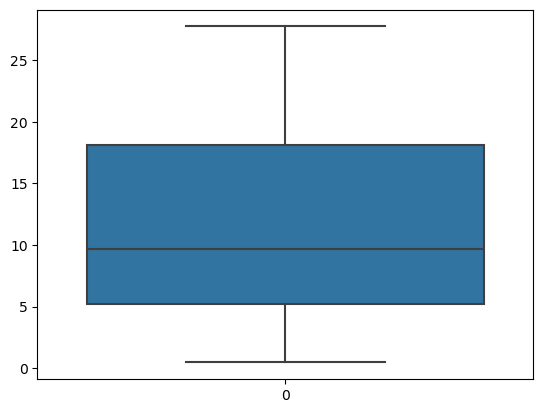

In [22]:
sns.boxplot(df["INDUS"])

In [23]:
df["CHAS"].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

<Axes: >

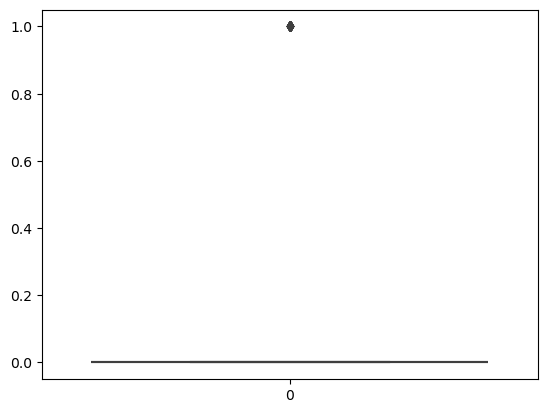

In [24]:
sns.boxplot(df["CHAS"])

<Axes: ylabel='count'>

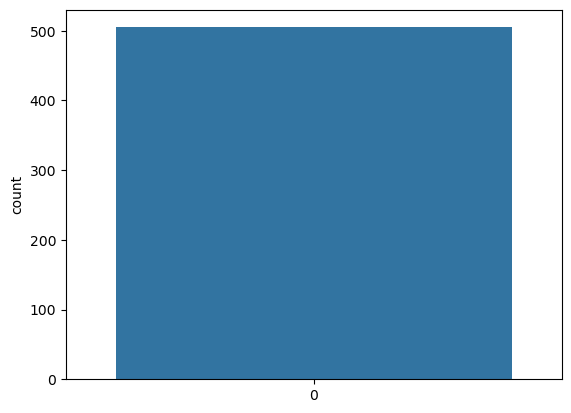

In [25]:
sns.countplot(df["CHAS"])

In [26]:
df["CHAS"].to_string()

"0      0\n1      0\n2      0\n3      0\n4      0\n5      0\n6      0\n7      0\n8      0\n9      0\n10     0\n11     0\n12     0\n13     0\n14     0\n15     0\n16     0\n17     0\n18     0\n19     0\n20     0\n21     0\n22     0\n23     0\n24     0\n25     0\n26     0\n27     0\n28     0\n29     0\n30     0\n31     0\n32     0\n33     0\n34     0\n35     0\n36     0\n37     0\n38     0\n39     0\n40     0\n41     0\n42     0\n43     0\n44     0\n45     0\n46     0\n47     0\n48     0\n49     0\n50     0\n51     0\n52     0\n53     0\n54     0\n55     0\n56     0\n57     0\n58     0\n59     0\n60     0\n61     0\n62     0\n63     0\n64     0\n65     0\n66     0\n67     0\n68     0\n69     0\n70     0\n71     0\n72     0\n73     0\n74     0\n75     0\n76     0\n77     0\n78     0\n79     0\n80     0\n81     0\n82     0\n83     0\n84     0\n85     0\n86     0\n87     0\n88     0\n89     0\n90     0\n91     0\n92     0\n93     0\n94     0\n95     0\n96     0\n97     0\n98     0\n99     0\

In [27]:
df["NOX"].value_counts()

NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: count, Length: 81, dtype: int64

<Axes: >

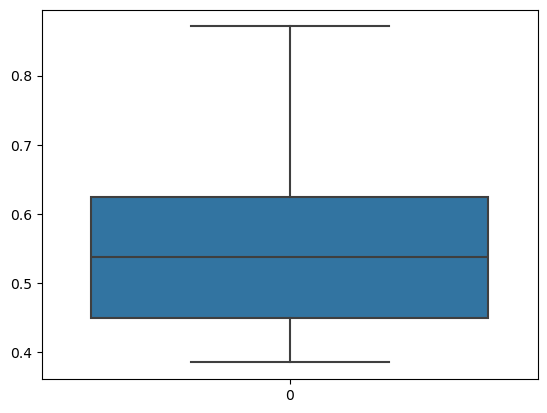

In [28]:
sns.boxplot(df["NOX"])

<Axes: >

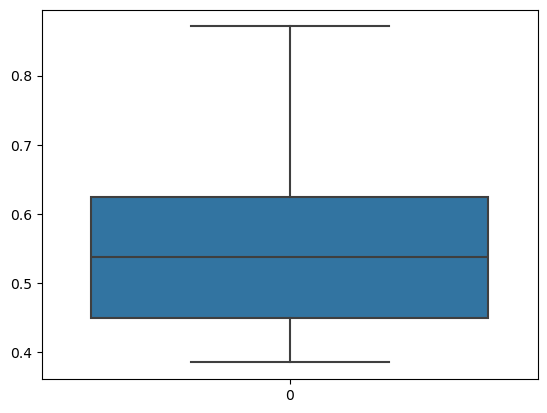

In [29]:
sns.boxplot(df["NOX"])

<Axes: >

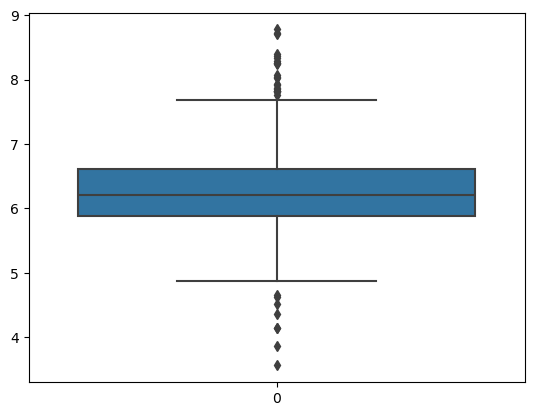

In [30]:
sns.boxplot(df["RM"])

In [31]:
df["RM"].value_counts()

RM
5.713    3
6.167    3
6.127    3
6.229    3
6.405    3
        ..
5.859    1
6.416    1
5.572    1
5.880    1
6.976    1
Name: count, Length: 446, dtype: int64

In [32]:
df["AGE"].value_counts()

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
74.4      1
73.4      1
33.1      1
68.7      1
89.3      1
Name: count, Length: 356, dtype: int64

<Axes: >

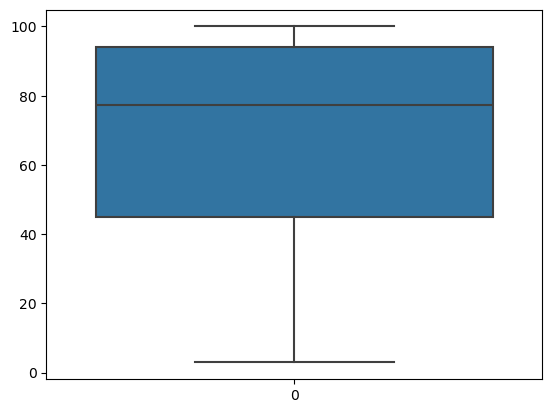

In [33]:
sns.boxplot(df["AGE"])

In [34]:
df["DIS"].value_counts()

DIS
3.4952    5
5.7209    4
6.8147    4
5.2873    4
5.4007    4
         ..
2.1620    1
2.0407    1
1.9709    1
1.7984    1
2.5050    1
Name: count, Length: 411, dtype: int64

<Axes: >

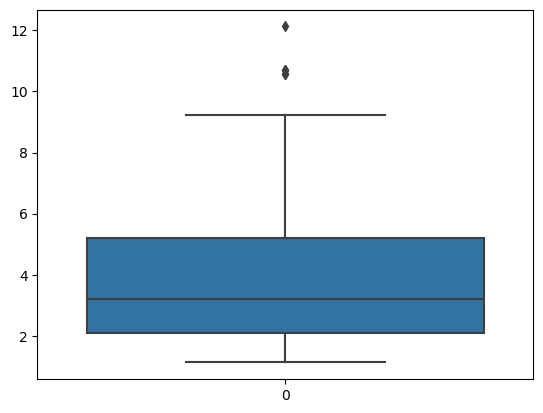

In [35]:
sns.boxplot(df["DIS"])

In [69]:
df=df[df["DIS"]!=12.1265]
df=df[df["DIS"]!=10.5857]
df=df[df["DIS"]!=10.7103]

<Axes: >

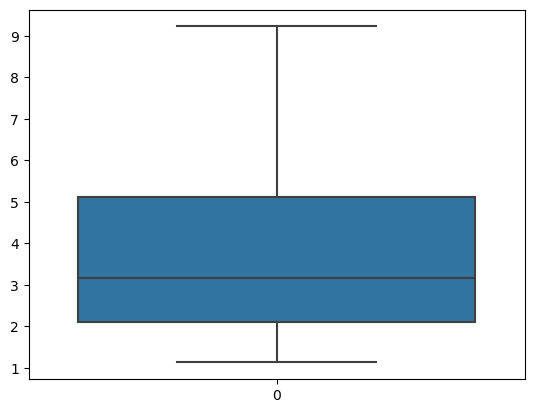

In [37]:
sns.boxplot(df["DIS"])

In [38]:
df["RAD"].value_counts()

RAD
24    131
5     114
4     106
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

<Axes: >

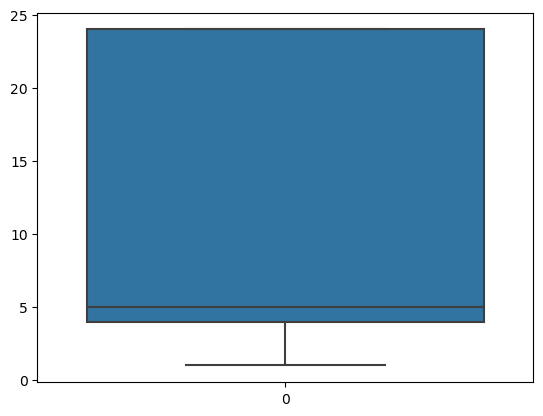

In [39]:
sns.boxplot(df["RAD"])

In [40]:
df["TAX"].value_counts()

TAX
666.0    131
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
280.0      1
226.0      1
244.0      1
313.0      1
285.0      1
Name: count, Length: 63, dtype: int64

<Axes: >

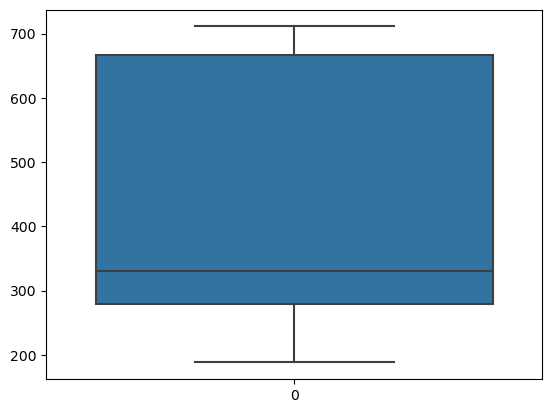

In [41]:
sns.boxplot(df["TAX"])

In [42]:
df["PTRATIO"].value_counts()

PTRATIO
20.2    139
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
19.1     17
18.6     17
18.4     16
16.6     16
21.2     15
15.2     13
13.0     12
17.9     11
20.9     11
18.7      9
19.6      8
19.7      8
17.6      7
16.4      6
16.9      5
16.0      5
20.1      5
18.0      5
16.1      5
18.5      4
16.8      4
18.2      4
19.0      4
14.9      4
17.0      3
18.9      3
12.6      3
14.8      3
15.3      3
15.9      2
15.6      2
18.3      2
18.8      2
14.4      1
13.6      1
15.1      1
17.3      1
21.1      1
15.5      1
Name: count, dtype: int64

<Axes: >

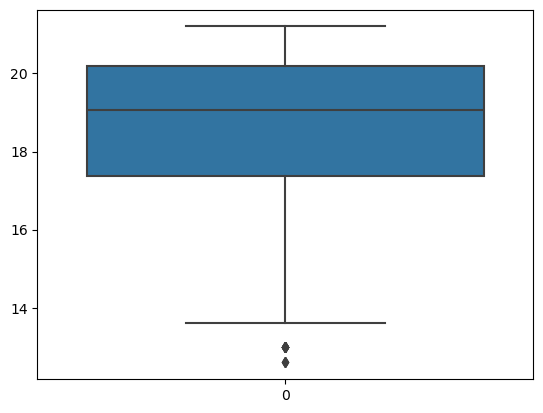

In [43]:
sns.boxplot(df["PTRATIO"])

In [70]:
df=df[df["PTRATIO"]!=12.6]

<Axes: >

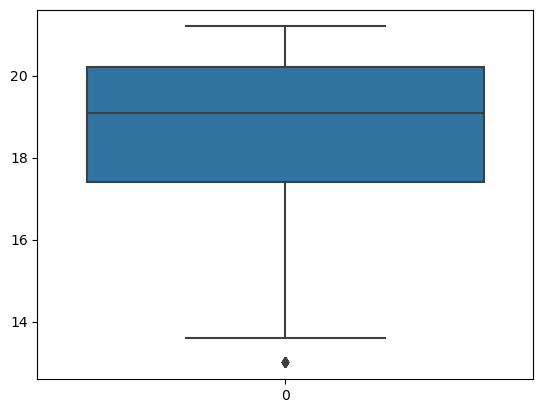

In [45]:
sns.boxplot(df["PTRATIO"])

In [46]:
df["B"].value_counts()

B
396.90    119
395.24      3
393.74      3
341.60      2
388.45      2
         ... 
374.43      1
338.92      1
364.31      1
353.89      1
391.99      1
Name: count, Length: 350, dtype: int64

<Axes: >

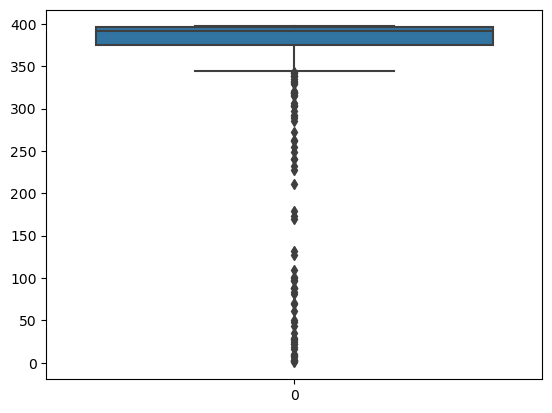

In [81]:
sns.boxplot(df["B"])

In [47]:
df["LSTAT"].value_counts()

LSTAT
14.10    3
6.36     3
18.13    3
13.44    2
12.67    2
        ..
1.73     1
6.43     1
16.14    1
15.12    1
7.88     1
Name: count, Length: 449, dtype: int64

<Axes: >

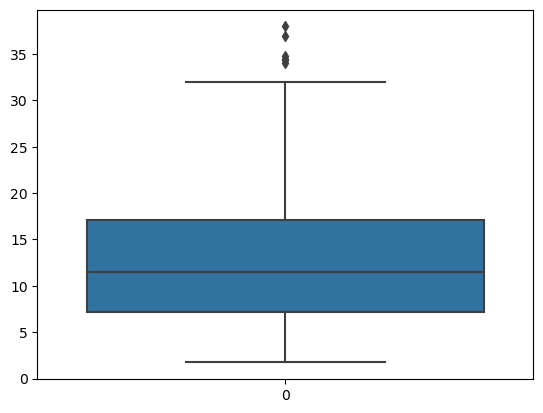

In [48]:
sns.boxplot(df["LSTAT"])

In [49]:
df["MEDV"].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
48.3     1
41.7     1
31.7     1
46.7     1
8.1      1
Name: count, Length: 226, dtype: int64

<Axes: >

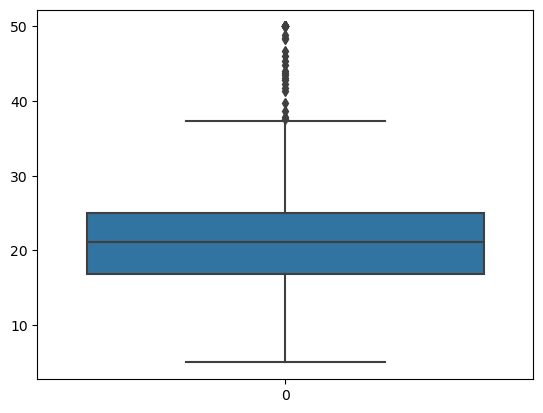

In [50]:
sns.boxplot(df["MEDV"])

In [ ]:
sns.pairplot(df, hue="species")

In [ ]:
# !pip install ydata-profiling

In [ ]:
# !pip install pandas-profiling

In [ ]:
print(boston.DESCR)

In [71]:
# Exploratory Data Analysis
# COrrelation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.207110,0.428942,-0.058391,0.445232,-0.265594,0.372099,-0.408384,0.661498,0.617059,0.309844,-0.438141,0.491942,-0.404416
ZN,-0.207110,1.000000,-0.513289,-0.032943,-0.498690,0.317099,-0.553241,0.623356,-0.300457,-0.313114,-0.393737,0.175613,-0.401704,0.365601
INDUS,0.428942,-0.513289,1.000000,0.058458,0.756484,-0.394398,0.633622,-0.705849,0.589766,0.723368,0.382453,-0.358072,0.596936,-0.483142
CHAS,-0.058391,-0.032943,0.058458,1.000000,0.087490,0.094330,0.082380,-0.094427,-0.009645,-0.036920,-0.127919,0.050293,-0.057912,0.177601
NOX,0.445232,-0.498690,0.756484,0.087490,1.000000,-0.302458,0.724056,-0.776391,0.606298,0.668578,0.179728,-0.381089,0.583892,-0.424979
RM,-0.265594,0.317099,-0.394398,0.094330,-0.302458,1.000000,-0.242789,0.215514,-0.210558,-0.294707,-0.342775,0.126714,-0.617931,0.696611
AGE,0.372099,-0.553241,0.633622,0.082380,0.724056,-0.242789,1.000000,-0.747991,0.448457,0.505637,0.262360,-0.272956,0.596156,-0.377366
DIS,-0.408384,0.623356,-0.705849,-0.094427,-0.776391,0.215514,-0.747991,1.000000,-0.499774,-0.551904,-0.241570,0.302017,-0.494059,0.254908
RAD,0.661498,-0.300457,0.589766,-0.009645,0.606298,-0.210558,0.448457,-0.499774,1.000000,0.911203,0.467851,-0.446302,0.483358,-0.376975
TAX,0.617059,-0.313114,0.723368,-0.036920,0.668578,-0.294707,0.505637,-0.551904,0.911203,1.000000,0.467612,-0.443837,0.541815,-0.465326


In [26]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [49]:
# df

In [53]:
df.shape

(497, 14)

In [73]:
import seaborn as sns
# sns.pairplot(df)

In [55]:
plt.scatter(dataset["CRIM"],dataset["MEDV"])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

KeyError: 'MEDV'

In [ ]:
plt.scatter(dataset["RM"],dataset["Price"])
plt.xlabel("RM")
plt.ylabel("Price") # both inc

In [ ]:
import seaborn as sns
sns.regplot(x="RM",y="MEDV",data=dataset)

In [43]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

TypeError: string indices must be integers, not 'str'

In [44]:
sns.regplot(x="CHAS ",y="Price",data=dataset)

KeyError: 'CHAS '

In [38]:
sns.regplot(x="PTRATIO ",y="MEDV",data=dataset) # PTRATIO inc price is decreses

KeyError: 'PTRATIO '

In [39]:
df.shape

(505, 14)

In [60]:
# Independent and Dependent feature
# Price is dependent feature all remaining are independent feature

# x=dataset.iloc[:,:,-1]
# y=dataset.iloc[:,-1]

In [41]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411.0,18.3,370.78,5.49,24.1
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,22.6


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined

In [74]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [75]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


C:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'stats' is not defined

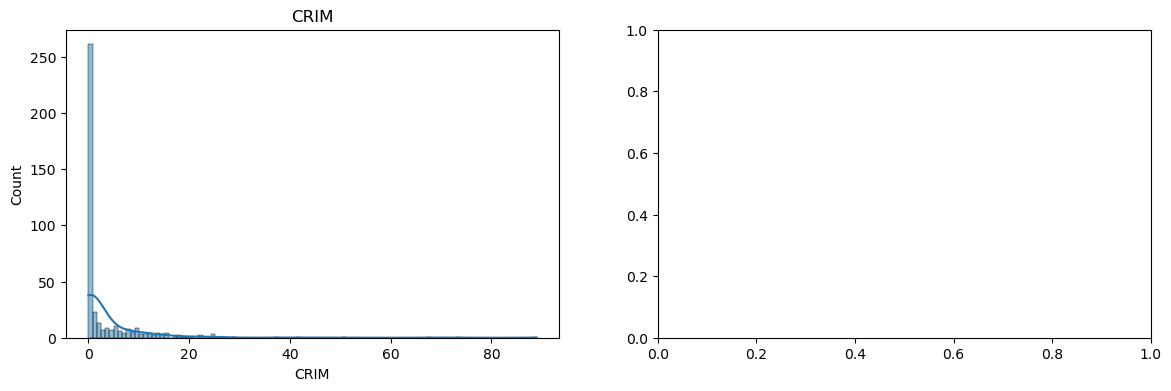

In [77]:
# Plotting the distplots without any transformation
for col in df.columns[:-1]:   # exclude target column
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)   # column by name
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [ ]:
# Standarized the dataset

In [33]:
# %pip install ydata-profiling

In [116]:
import pandas as pd

# Show summary statistics (min, max, mean, std)
print(df.describe().T[["min", "max", "mean", "std"]])

               min       max        mean         std
CRIM       0.00632   73.5341    3.506066    7.779339
ZN         0.00000  100.0000   10.181452   21.705684
INDUS      0.46000   27.7400   11.294597    6.801493
NOX        0.38500    0.8710    0.557124    0.115211
RM         3.56100    8.7800    6.275556    0.699928
AGE        2.90000  100.0000   69.236492   27.892994
DIS        1.12960    9.2229    3.702308    1.974874
TAX      188.00000  711.0000  409.354839  169.099358
PTRATIO   13.00000   21.2000   18.486492    2.112818
B          0.32000  396.9000  356.118589   92.108675
LSTAT      1.73000   37.9700   12.764859    7.148672
MEDV       5.00000   50.0000   22.442339    9.144299


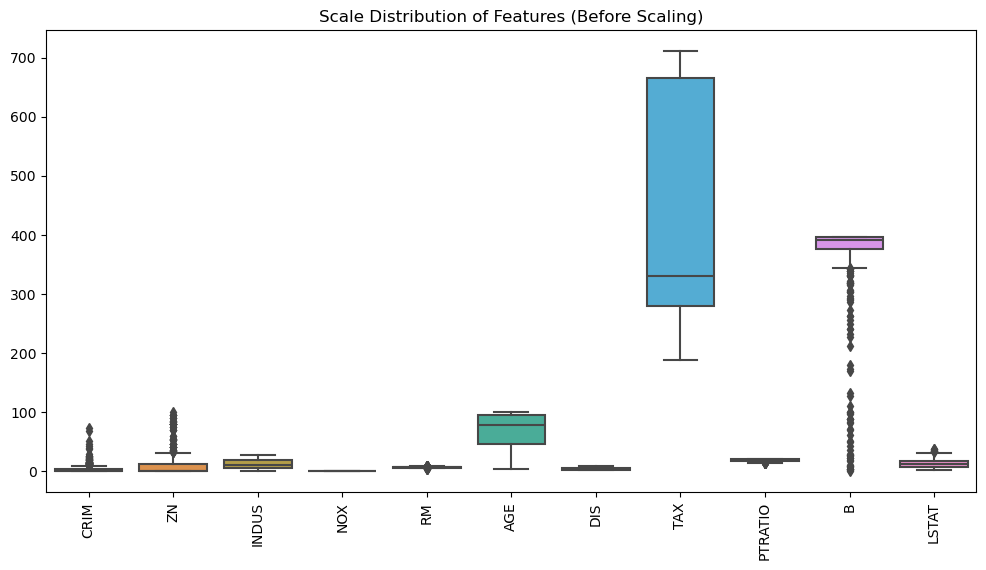

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop("MEDV", axis=1))  # drop target
plt.xticks(rotation=90)
plt.title("Scale Distribution of Features (Before Scaling)")
plt.show()

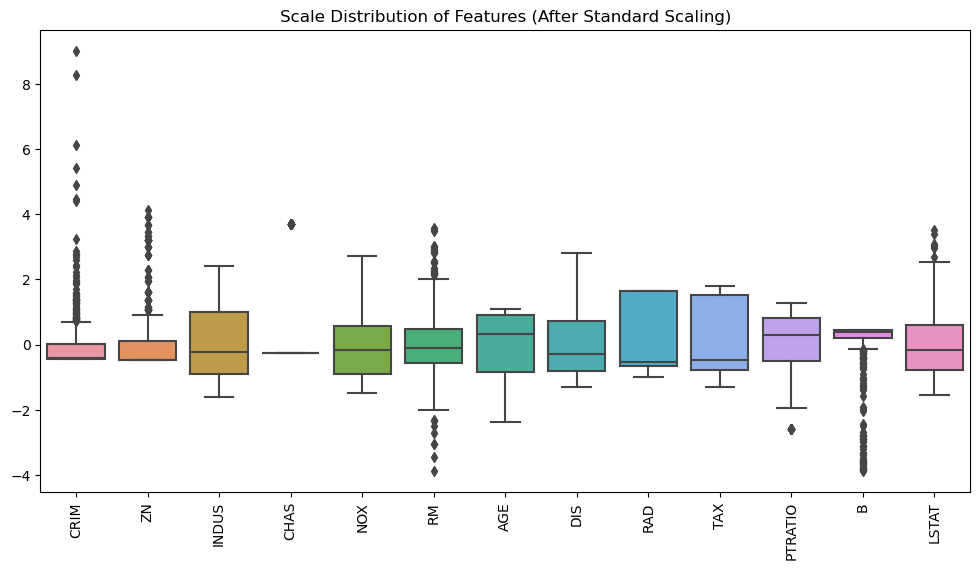

In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling (mean=0, std=1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("MEDV", axis=1)),
                         columns=df.columns[:-1])

# Add back target
df_scaled["MEDV"] = df["MEDV"]

# Visualize again
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled.drop("MEDV", axis=1))
plt.xticks(rotation=90)
plt.title("Scale Distribution of Features (After Standard Scaling)")
plt.show()

Here see not need scaling this type of data

In [134]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252.0,18.3,395.63,4.32,30.8
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296.0,16.6,393.23,10.11,23.2
475,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666.0,20.2,302.76,24.10,13.3


In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [135]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77
230,0.53700,0.0,6.20,0,0.5040,5.981,68.1,3.6715,8,307.0,17.4,378.35,11.65
401,14.23620,0.0,18.10,0,0.6930,6.343,100.0,1.5741,24,666.0,20.2,396.90,20.32
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224.0,20.2,389.71,5.68
223,0.61470,0.0,6.20,0,0.5070,6.618,80.8,3.2721,8,307.0,17.4,396.90,7.60
322,0.35114,0.0,7.38,0,0.4930,6.041,49.9,4.7211,5,287.0,19.6,396.90,7.70
430,8.49213,0.0,18.10,0,0.5840,6.348,86.1,2.0527,24,666.0,20.2,83.45,17.64
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63
25,0.84054,0.0,8.14,0,0.5380,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307.0,17.4,385.91,2.47


In [136]:
y_train

56     24.7
230    24.3
401     7.2
333    22.2
223    30.1
322    20.4
430    14.5
384     8.8
25     13.9
232    41.7
180    39.8
443    15.4
154    17.0
42     25.3
420    16.7
277    33.1
495    23.1
485    21.2
228    46.7
315    16.2
424    11.7
417    10.4
326    23.0
22     15.2
328    19.3
46     20.0
31     14.5
113    18.7
337    18.5
448    14.1
306    33.4
57     31.6
258    36.0
24     15.6
17     17.5
172    23.1
66     19.4
415     7.2
421    14.2
94     20.6
148    17.8
478    14.6
23     14.5
237    31.5
481    23.7
193    31.1
5      28.7
116    21.2
45     19.3
16     23.1
492    20.1
363    16.8
3      33.4
407    27.9
346    17.2
60     18.7
110    21.7
320    23.8
264    36.5
29     21.0
480    23.0
185    29.6
26     16.6
7      27.1
459    20.0
108    19.8
37     21.0
157    41.3
472    23.2
118    20.4
114    18.5
181    36.2
176    23.2
144    11.8
403     8.3
386    10.5
314    23.8
211    19.3
214    23.7
451    15.2
141    14.4
371    50.0
67     22.0
207 

In [139]:
df.shape

(496, 14)

In [137]:
x_train.shape

(396, 13)

In [138]:
y_train.shape

(396,)

In [141]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [142]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_pred is  predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Root mean square:",rmse)

Mean Squared Error (MSE): 14.571003793451677
Mean Absolute Error (MAE): 2.716610638323489
R-squared (R²): 0.7570777848291961
Root mean square: 3.8171984220697355


In [80]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
x_train=scaler.fit_transform(x_train)

In [83]:
x_test=scaler.transform(x_test)

In [84]:
x_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [85]:
x_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

# Model Training

In [86]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [87]:
regression.fit(x_train,y_train)

LinearRegression()

In [88]:
# print the coeffecients and the intercept
print(regression.coef_) # this will equal to no of independent feature

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [89]:
print(regression.intercept_)

22.796534653465343


In [90]:
# On which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [91]:
# Prediction with Test Data
reg_pred=regression.predict(x_test)

In [92]:
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

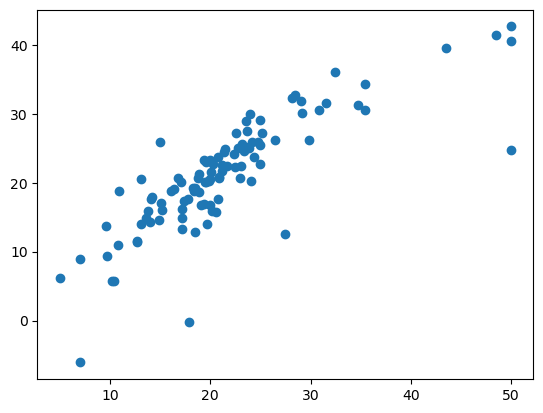

In [94]:
# plot a scatter plot fo the prediction
plt.scatter(y_test,reg_pred) # when show linear our model perform well (reg_pred is true value)

In [98]:
# Residuals means (error)
residuals=y_test-reg_pred

In [99]:
residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: MEDV, Length: 102, dtype: float64

C:\Users\Solution\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


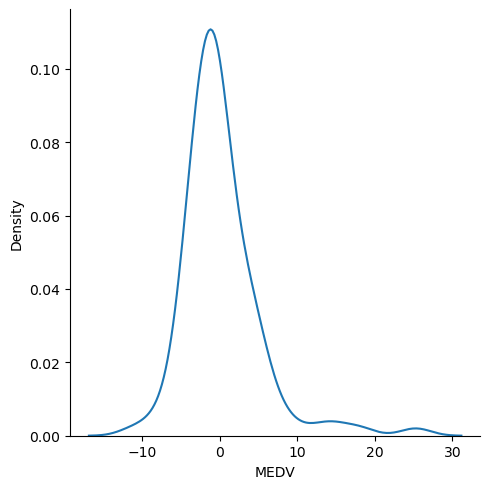

In [101]:
# plot this residuals
sns.displot(residuals,kind="kde")

# Assumptions

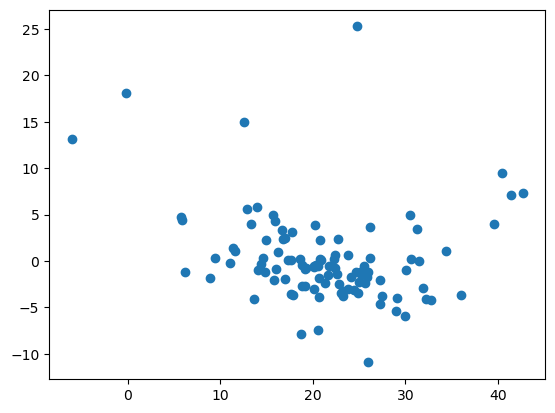

In [102]:
# scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(reg_pred,residuals) # predict on output and predicted value

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred))) # these model show how your model performing well

3.1890919658878474
24.291119474973513
4.928602182665336


# R square and adjusted R square

In [105]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score) # It is approx good

0.668759493535632


In [106]:
# display adjusted R-squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6198262368988503

# New Data Prediction

In [115]:
boston.data.shape

(506, 13)

In [118]:
boston.data.iloc[0].shape

(13,)

In [121]:
import numpy as np

In [126]:
boston.data.iloc[0].values.reshape(1, -1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [127]:
boston.data.iloc[0].values.reshape(1, -1).shape

(1, 13)

In [130]:
regression.predict(boston.data.iloc[0].values.reshape(1, -1))

array([-90.14868001])

In [132]:
# transformation of new data
scaler.transform(boston.data.iloc[0].values.reshape(1, -1))

C:\Users\Solution\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4064505 ,  0.27809835, -1.25979517, -0.27808871, -0.15723342,
         0.365677  , -0.1200431 ,  0.13239061, -0.97404758, -0.65092617,
        -1.35597347,  0.44418004, -1.05291444]])

In [134]:
regression.predict(scaler.transform(boston.data.iloc[0].values.reshape(1, -1)))

C:\Users\Solution\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])

In [140]:
import pickle

with open("regmodel.pkl", "wb") as f:
    pickle.dump(regression, f)

In [142]:
pickle_model=pickle.load(open("regmodel.pkl","rb"))

In [145]:
## prediction
pickle_model.predict(scaler.transform(boston.data.iloc[0].values.reshape(1, -1)))

C:\Users\Solution\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])